## Imports

In [1]:
import keras
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Load Model

In [2]:
model = keras.models.load_model("./data/trained_models/name.h5")

In [3]:
for layer in model.layers:

    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d_7 (3, 3, 1, 64)
conv2d_8 (3, 3, 64, 64)
conv2d_9 (3, 3, 64, 128)
conv2d_10 (3, 3, 128, 128)
conv2d_11 (3, 3, 128, 256)


## Data and Preprocessing

In [30]:
file = './data/test.csv'
testimages = pd.read_csv(file)

x_testimage = testimages.values
x = x_testimage / 255.0

x = x.reshape(-1,28,28,1)

print(f'Data shape is: {x.shape}')

Data shape is: (28000, 28, 28, 1)


In [31]:
index_of_image = 0

input_img = x[index_of_image]
input_image = x[index_of_image]

## Filter

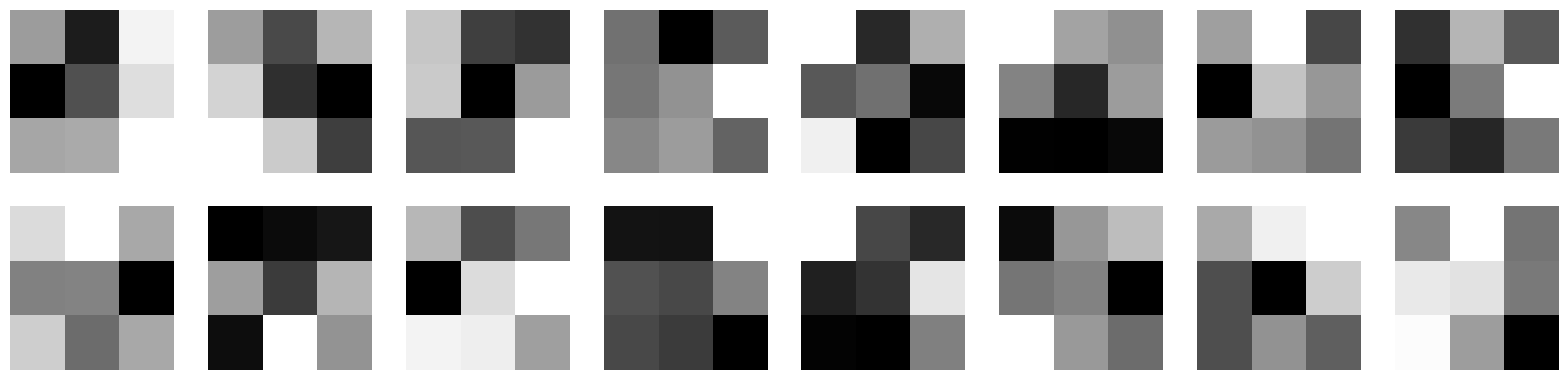

In [32]:
weights, biases = model.layers[1].get_weights()

n_filters = weights.shape[3]

plt.figure(figsize=(20, 20))

for i in range(16):  #n_filters to display all
    plt.subplot(8, 8, i+1)
    plt.imshow(weights[:,:,0,i], cmap="gray")
    plt.axis("off")

plt.show()

## Feature Maps

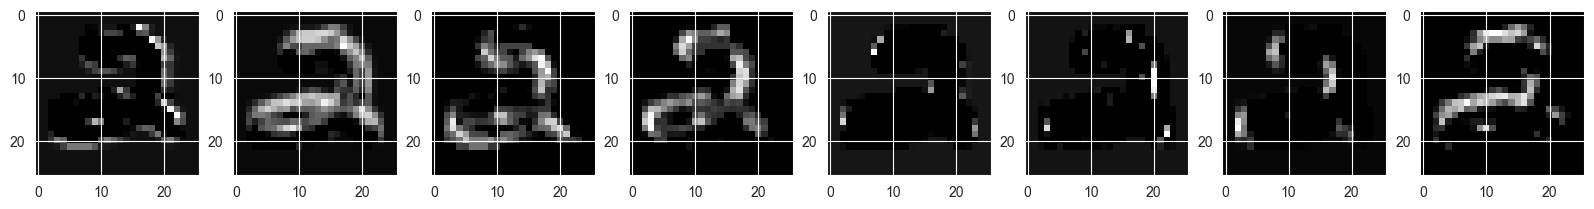

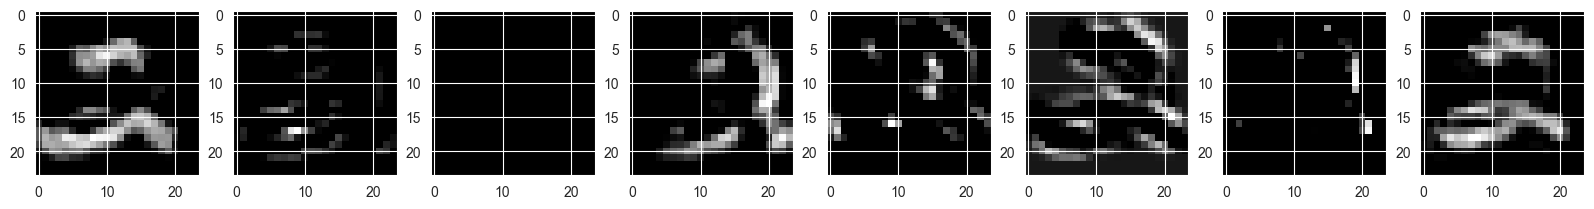

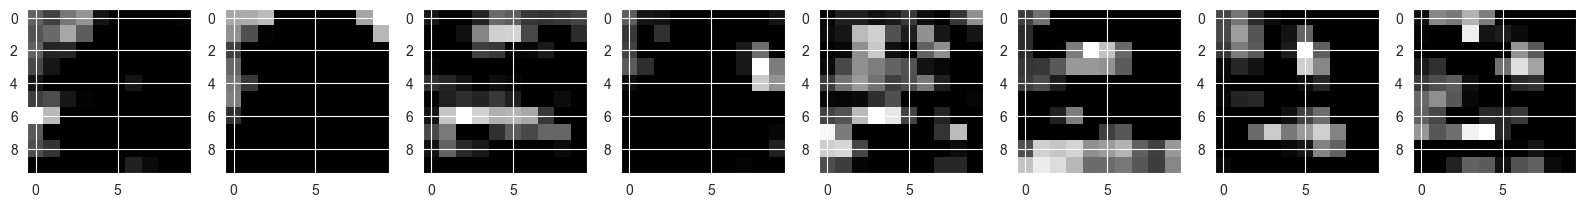

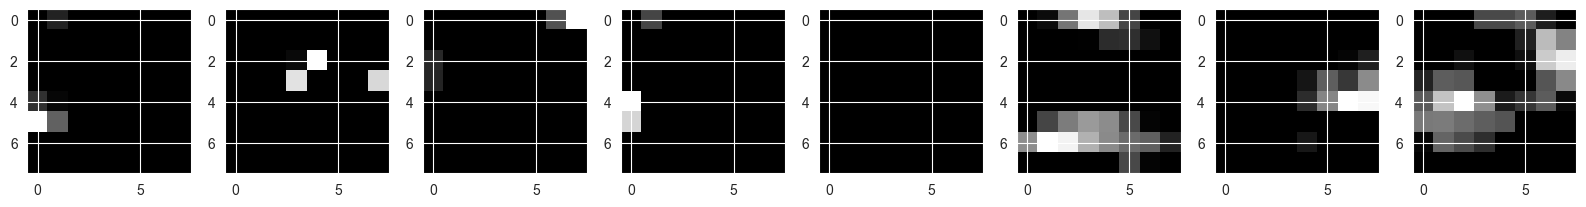

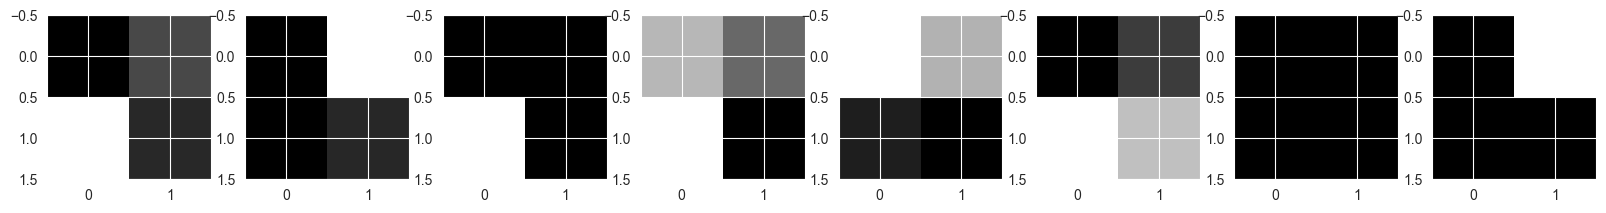

In [33]:
input_img = input_img.reshape(1, 28, 28, 1)

for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        output_tensor = layer.output

        get_feature_maps = tf.keras.backend.function([model.input], [output_tensor])

        feature_maps = get_feature_maps([input_img])[0]

        n_filters = feature_maps.shape[3]

        plt.figure(figsize=(20, 20))

        for i in range(8):
            plt.subplot(8, 8, i+1)
            plt.imshow(feature_maps[0, :, :, i], cmap="gray")

        plt.show()


## GradCam visualization

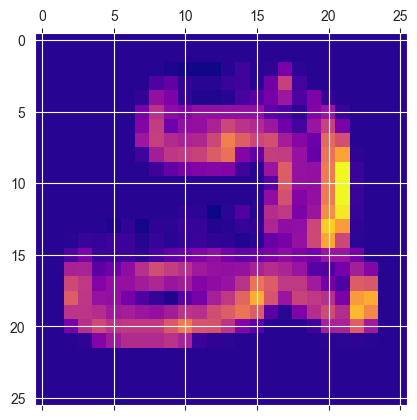

In [39]:
layer_conv = "conv2d_7"

last_conv_layer = model.get_layer(layer_conv)
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(input_img)
    loss = predictions[:, 0] 

gradients = tape.gradient(loss, conv_outputs)

pooled_gradients = tf.reduce_mean(gradients, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_gradients, conv_outputs), axis=-1)

heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

plt.matshow(heatmap[0], cmap='plasma')
plt.show()